In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('./가공데이터/keyword_emotion_sentence_only_train.csv', index_col=0)

In [3]:
df

,상황키워드,감정_대분류,사람문장
0,"진로,취업,직장",분노,일은 왜 해도 해도 끝이 없을까? 화가 난다. 그냥 내가 해결하는 게 나아. 남들한...
1,"진로,취업,직장",분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....
2,"진로,취업,직장",분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3,"진로,취업,직장",분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4,"진로,취업,직장",분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나. 상사인 나에게 ...
...,...,...,...
51625,재정,분노,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고....
51626,재정,불안,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나. 마음...
51627,재정,상처,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정...
51628,대인관계,불안,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42874 entries, 0 to 51629
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   42874 non-null  object
 1   감정_대분류  42874 non-null  object
 2   사람문장    42874 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [5]:
df['감정_대분류'].value_counts()

불안    9320
분노    9160
상처    9143
슬픔    9125
기쁨    6126
Name: 감정_대분류, dtype: int64

In [6]:
df['사람문장'] = df['사람문장'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_67316/2314435747.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['사람문장'] = df['사람문장'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")


In [7]:
df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 2. 감정 분류

In [9]:
emo_df = df

In [10]:
emo_target_df = emo_df['감정_대분류']

In [11]:
emo_sentence_df = emo_df['사람문장']

In [12]:
emo_target_df.value_counts()

불안    9320
분노    9160
상처    9143
슬픔    9125
기쁨    6126
Name: 감정_대분류, dtype: int64

In [13]:
emo_df.loc[(emo_df['감정_대분류']=='불안'), '감정_대분류'] = 0
emo_df.loc[(emo_df['감정_대분류']=='분노'), '감정_대분류'] = 1
emo_df.loc[(emo_df['감정_대분류']=='상처'), '감정_대분류'] = 2 
emo_df.loc[(emo_df['감정_대분류']=='슬픔'), '감정_대분류'] = 3 
emo_df.loc[(emo_df['감정_대분류']=='기쁨'), '감정_대분류'] = 4 

In [15]:
emo_df['감정_대분류'].value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
Name: 감정_대분류, dtype: int64

In [16]:
emo_target_df = emo_df['감정_대분류']

In [17]:
emo_target_df.value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
Name: 감정_대분류, dtype: int64

# 3. 텍스트 토큰화 및 Pad_Sequences

In [18]:
from konlpy.tag import Okt
from tqdm import tqdm

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [20]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [21]:
okt = Okt()

In [22]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 42874/42874 [01:24<00:00, 505.94it/s]


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [ ]:
print(tokenizer.word_index)

In [26]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14182
등장 빈도가 2번 이하인 희귀 단어의 수: 5669
단어 집합에서 희귀 단어의 비율: 39.97320547172472
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5732984700627227


In [27]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8514


In [28]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [29]:
y_train = np.array(emo_target_df)

In [30]:
y_train

array([1, 1, 1, ..., 2, 0, 2], dtype=object)

최대 길이 : 92
평균 길이 : 29.80018192844148


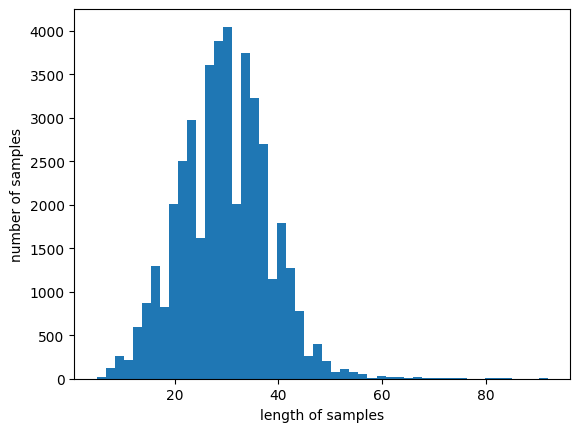

In [31]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [33]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.79880580305081


In [34]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [35]:
len(y_train)

42874

In [36]:
len(X_train)

42874

## 4. 모델 구축

In [37]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [38]:
y_train = y_train.astype(int)

In [39]:
pd.Series(y_train).value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
dtype: int64

In [40]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [ ]:
loaded_model = load_model('best_model.h5')

In [ ]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('불안')
  elif score == 1:
    print('분노')
  elif score == 2:
    print('상처')
  elif score == 3:
    print('슬픔')
  elif score == 4:
    print('기쁨')
  # print(f'score = {score}')